1. DATA CLEANSING AND ANALYSIS

In [8]:
# 라이브러리 버전 확인
# terminal에서 pip list

In [4]:
# https://www.kaggle.com/code/arthurtok/feature-ranking-rfe-random-forest-linear-models

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
# from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.ensemble import RandomForestRegressor

house = pd.read_csv("C:/hkpark_/data-science-tutorial/data-science-tutorial/dataset/kc_house_data.csv")
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

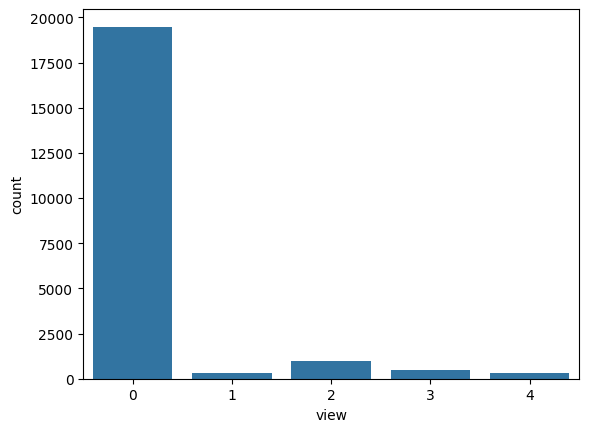

In [11]:
sns.countplot(x="view", data=house)
house.loc[:,'view'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

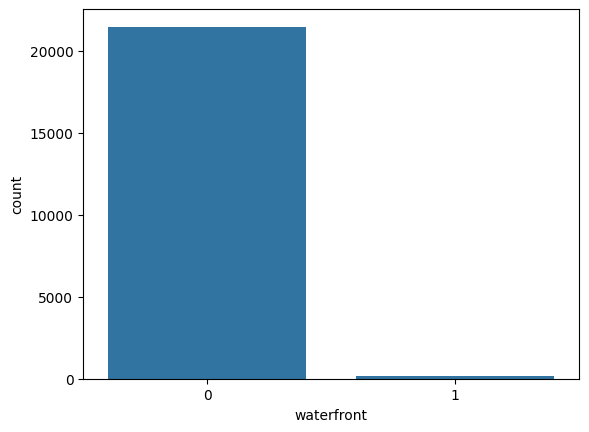

In [12]:
sns.countplot(x="waterfront", data=house)
house.loc[:,'waterfront'].value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

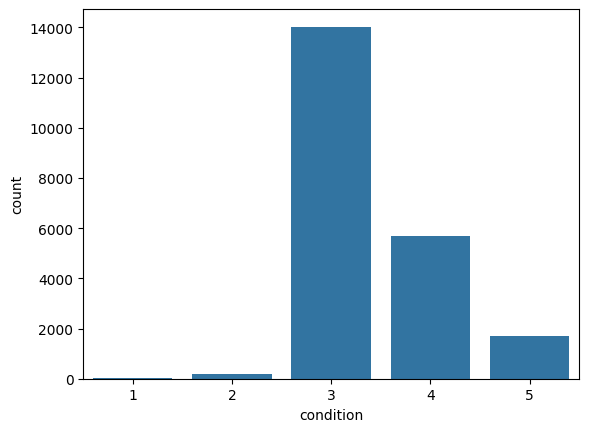

In [8]:
sns.countplot(x="condition", data=house)
house.loc[:,'condition'].value_counts()

In [10]:
house=house.drop(["date","id"], axis = 1)
house.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [16]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


min-max scaling 

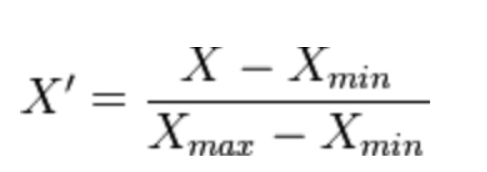

In [17]:
import numpy as np

house_scale_0 = (house - np.min(house))/(np.max(house) - np.min(house))
house_scale_0.describe().T

TypeError: '<=' not supported between instances of 'int' and 'str'

In [18]:
knn_X = house_scale_0.drop("price", axis = 1)
knn_y = house_scale_0["price"] # I want estimate to acceleration

NameError: name 'house_scale_0' is not defined

In [19]:
from sklearn.model_selection import train_test_split

independent_train, independent_test, dependent_train, dependent_test = train_test_split(
    knn_X, 
    knn_y, 
    test_size = 0.10, 
    random_state = 20)

NameError: name 'knn_X' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor().fit(independent_train, dependent_train)
predicted_values = knn_model.predict(independent_test)

In [ ]:
predict_df = pd.DataFrame({"Dependent_Test" : dependent_test, "Dependent_Predicted" : predicted_values})
predict_df.head()

,Dependent_Test,Dependent_Predicted
2212,0.071443,0.044716
16859,0.026249,0.031795
21053,0.100781,0.122553
7757,0.029230,0.044353
12278,0.040535,0.078521


In [ ]:
predict_df = (predict_df*(np.max(house.price) - np.min(house.price))) + np.min(house.price)
predict_df.head()

,Dependent_Test,Dependent_Predicted
2212,619755.514867,4.159633e+05
16859,275150.608457,3.174340e+05
21053,843451.630838,1.009466e+06
7757,297876.707889,4.131906e+05
12278,384077.446690,6.737238e+05


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
print("Root Mean Squared Error = ", np.sqrt(mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test)))

Mean Squared Error =  67259252178.50915
Root Mean Squared Error =  259343.88787574915


In [ ]:
r2_score(predict_df.Dependent_Predicted, predict_df.Dependent_Test)

-0.02206614046838795

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

knn_params = {"n_neighbors" : np.arange(1,11,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(independent_train, dependent_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [ ]:
knn_cv_model.best_params_["n_neighbors"]

9

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(independent_train, dependent_train)
predicted_values = knn_model.predict(independent_test)

In [ ]:
predict_df = pd.DataFrame({"Dependent_Test" : dependent_test, "Dependent_Predicted" : predicted_values})

In [ ]:
predict_df = (predict_df*(np.max(house.price) - np.min(house.price))) + np.min(house.price)
predict_df.head()

,Dependent_Test,Dependent_Predicted
2212,619755.514867,420331.379213
16859,275150.608457,347383.405730
21053,843451.630838,796321.518558
7757,297876.707889,384368.248340
12278,384077.446690,625807.005880


In [ ]:
print("Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted))
print("Root Mean Squared Error = ", np.sqrt(mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted)))

Mean Squared Error =  69037786834.96849
Root Mean Squared Error =  262750.42689778545


In [ ]:
r2_score(predict_df.Dependent_Test, predict_df.Dependent_Predicted)

0.5273388411331889

In [ ]:
from sklearn.model_selection import cross_val_score

MSE = []
MSE_CV = []

for k in range(10):
    k = k + 1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(independent_train, dependent_train)
    y_pred = knn_model.predict(independent_test)
    mse = mean_squared_error(y_pred, dependent_test)
    mse_cv = -1 * cross_val_score(knn_model, independent_train,dependent_train, cv = 10,
                         scoring = "neg_mean_squared_error").mean()
    MSE.append(mse)
    MSE_CV.append(mse_cv)
    print("k =", k, "MSE :", mse, "MSE_CV:", mse_cv)

k = 1 MSE : 0.001601323673961592 MSE_CV: 0.0017279719970319904
k = 2 MSE : 0.0012420840004418773 MSE_CV: 0.0013409578164857694
k = 3 MSE : 0.0011560683102162298 MSE_CV: 0.001190383883841946
k = 4 MSE : 0.001143156603163817 MSE_CV: 0.001149147245924687
k = 5 MSE : 0.0011568374467682307 MSE_CV: 0.0011216867433816295
k = 6 MSE : 0.0011575275951746186 MSE_CV: 0.0011161529113657268
k = 7 MSE : 0.001164830120191159 MSE_CV: 0.0011118774618374438
k = 8 MSE : 0.0011663917755420571 MSE_CV: 0.0011038437684721036
k = 9 MSE : 0.0011874276692926589 MSE_CV: 0.0010997011295663267
k = 10 MSE : 0.0012009714046050562 MSE_CV: 0.001104052639366969


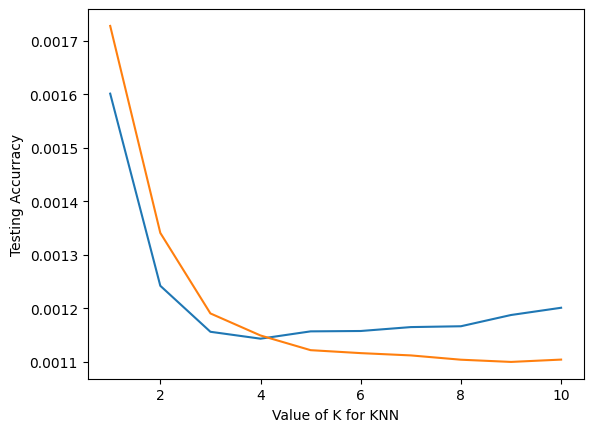

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1,11,1), MSE)
plt.plot(np.arange(1,11,1), MSE_CV)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accurracy");

In [ ]:
# 행과 열의 수 출력
rows, cols = house.shape
print("행의 수:", rows)
print("열의 수:", cols)

행의 수: 21613
열의 수: 21


In [ ]:
# Looking for nulls
print(house.isnull().any())
# Inspecting type
print(house.dtypes)

bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [ ]:
# Dropping the id and date columns
house = house.drop(['id', 'date'],axis=1)

rows, cols = house.shape
print("행의 수:", rows)
print("열의 수:", cols)

행의 수: 21613
열의 수: 19


In [ ]:
# 컬럼명 추출
columns = house.columns
print("컬럼명:", columns)

컬럼명: Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


C:\Users\samsung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


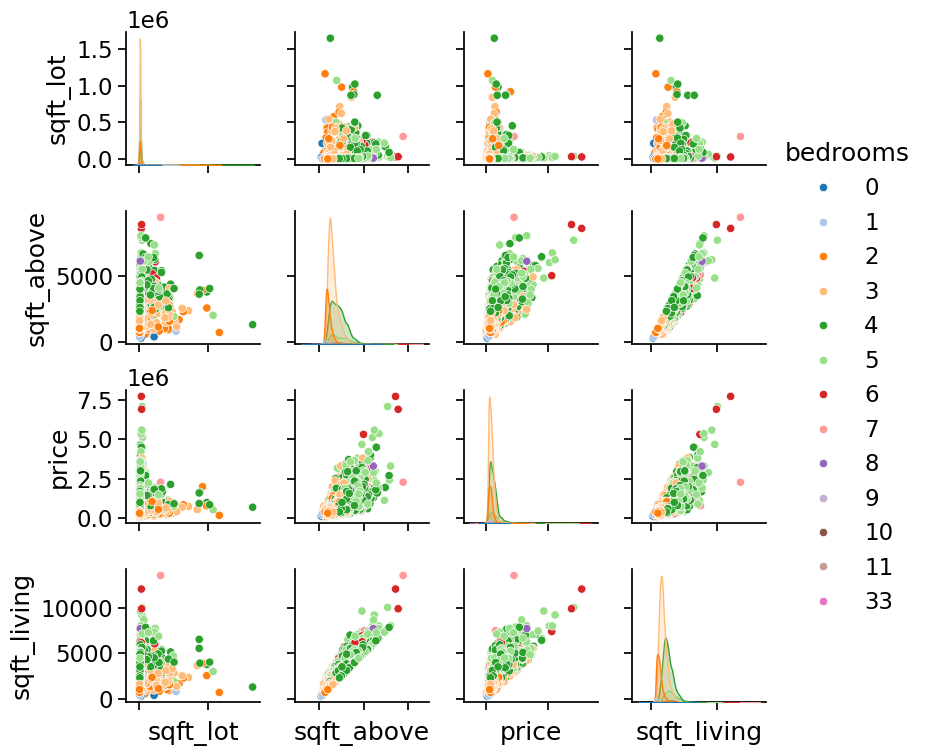

In [ ]:
#  'sqft_lot', 'sqft_above', 'price', 'sqft_living' 네 가지 특성을 선택하고, 'bedrooms' 수를 클래스로 하여 시각화
# 색상 팔레트는 'tab20'을 사용합니다. 플롯의 크기를 설정하기 위해 size=6
# g.set(xticklabels=[]): x 축 눈금 레이블 제거. 즉, 플롯의 아래쪽 축에 있는 눈금 레이블을 표시하지 않음

with sns.plotting_context("notebook",font_scale=1.5): 
    g = sns.pairplot(house[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=2)
g.set(xticklabels=[]);

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = house.loc[:,house.columns != 'price'], house.loc[:,'price']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: [221900. 397950. 180000. ... 394950. 378000. 207000.]
